## Comparing Two Means
Two different types of different groups:
- different groups of people w/ different experimental manipulations
- same group of people w/ different experimental manipulations at different times
- DON'T use a median split - turn a continuous variable into a categorical one.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('./spiderLong.dat', delim_whitespace=True)
data_rm = pd.read_csv('./spiderWide.dat', delim_whitespace=True)

data.head()

,Group,Anxiety
0,Picture,30
1,Picture,35
2,Picture,45
3,Picture,40
4,Picture,50


#### Problem with repeated-measures error bars

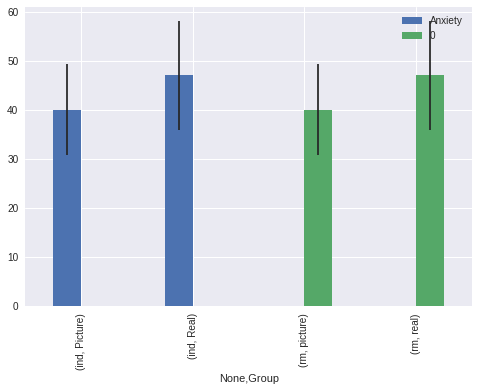

In [3]:
# Independent stats
grouped = data.groupby('Group')
means = grouped.mean()
errors = grouped.std()

# Repeated measures stats
means_rm = data_rm.mean()
errors_rm = data_rm.std()

both_means = pd.concat([means, means_rm], keys=['ind', 'rm'])
both_errors = pd.concat([errors, errors_rm], keys=['ind', 'rm'])
fig, ax = plt.subplots()
both_means.plot.bar(yerr=both_errors, ax=ax)

plt.show()

Error bars look identical between data-sets, but they should be different.

Need to correct for the differences in means between people. We care about the variance between conditions, not about the difference in means between people in the repeated-measures study.

#### To Correct:

In [4]:
data_rm = pd.read_csv('./spiderWide.dat', delim_whitespace=True)

# Grand mean
mean_g = data_rm.mean().mean()

# Mean per person
data_rm['mean'] = data_rm.mean(axis=1)

# Adjustment per person
data_rm['adj'] = mean_g - data_rm['mean']

data_rm['picture_adj'] = data_rm.picture + data_rm.adj
data_rm['real_adj'] = data_rm.real + data_rm.adj

data_rm

,picture,real,mean,adj,picture_adj,real_adj
0,30,40,35.0,8.5,38.5,48.5
1,35,35,35.0,8.5,43.5,43.5
2,45,50,47.5,-4.0,41.0,46.0
3,40,55,47.5,-4.0,36.0,51.0
4,50,65,57.5,-14.0,36.0,51.0
5,35,55,45.0,-1.5,33.5,53.5
6,55,50,52.5,-9.0,46.0,41.0
7,25,35,30.0,13.5,38.5,48.5
8,30,30,30.0,13.5,43.5,43.5
9,45,50,47.5,-4.0,41.0,46.0


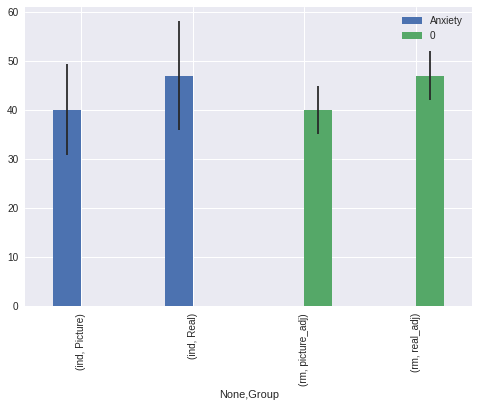

In [5]:
# The corrected box plot

# Repeated measures stats
means_rm = data_rm[['picture_adj', 'real_adj']].mean()
errors_rm = data_rm[['picture_adj', 'real_adj']].std()

both_means = pd.concat([means, means_rm], keys=['ind', 'rm'])
both_errors = pd.concat([errors, errors_rm], keys=['ind', 'rm'])
plt.clf()
fig, ax = plt.subplots()
both_means.plot.bar(yerr=both_errors, ax=ax)

plt.show()

Means are the same, errors are much smaller.

Two types of t-test:
- Independent-means - two experimental conditions w/ different populations
- Dependent-means - two experimental conditions tested w/ the same population

#### Calculating a t-test

((observed diff b/w sample means) - ( expected diff b/w pop means)) 
/ (estimate of std error of diff between two sample means)

Do this by performing a regression w/ dummy variable g. g=0 for picture group, and g=1 for real spider group.

x_ = b0 + (b1*g)

If g = 0
- x_picture = b0
- b0 is the mean of the base group (picture)

If g = 1, 
- x_real = x_picture + b1 
- b1 = x_real - x_picture
- b1 is the difference between means of the two groups

Since this is a regression equation, we are testing if the regression coefficient, b1  is = 0.

In [35]:
import scipy.stats as stats
import statsmodels.formula.api as sm

data_pic = data.loc[data.Group == 'Picture']
data_real = data.loc[data.Group == 'Real']


stats.ttest_ind(data_pic.Anxiety, data_real.Anxiety)

Ttest_indResult(statistic=-1.6813456149534149, pvalue=0.10683919238259681)

In [41]:
result = sm.ols(formula="Anxiety ~ Group", data=data).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Anxiety   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     2.827
Date:                Wed, 27 Sep 2017   Prob (F-statistic):              0.107
Time:                        19:13:57   Log-Likelihood:                -88.743
No. Observations:                  24   AIC:                             181.5
Df Residuals:                      22   BIC:                             183.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        40.0000      2.944     13.587      0.000      33.895      46.105
Group[T.Real]     7.0000      4.163      1.681      0.107      -1.634      15.634
==============================================================================
Omnibus:                        2.458   Durbin-Watson:                   1.805
Prob(Omnibus):                  0.293   Jarque-Bera (JB):                1.182
Skew:                          -0.004   Prob(JB):                        0.554
Kurtosis:                       1.913   Cond. No.                         2.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""